In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [43]:
import pandas as pd
df = pd.read_csv("D:/Training Datasets/IMDB.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming the dataset has 'review' column for text and 'sentiment' column for labels
reviews = df['review'].values
labels = df['sentiment'].values

# Tokenize the text data and restrict to top 10,000 words
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(reviews)
reviews_tokenized = tokenizer.texts_to_sequences(reviews)

In [45]:

# Pad sequences to a maximum length of 250
max_len = 250
reviews_padded = pad_sequences(reviews_tokenized, maxlen=max_len)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(reviews_padded, labels, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels for training data
y_train = label_encoder.fit_transform(y_train)

# Transform labels for testing data (using the same encoder)
y_test = label_encoder.transform(y_test)
y_test

array([1, 1, 0, ..., 1, 0, 1])

In [48]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (40000, 250) (40000,)
Testing set shape: (10000, 250) (10000,)


In [49]:
embedding_size = 32

In [50]:
# Define model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
model = Sequential()
model.add(Embedding(num_words, embedding_size, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [52]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)


Epoch 1/10
500/500 [==============================] - 7s 13ms/step - loss: 0.4573 - accuracy: 0.7789 - val_loss: 0.2821 - val_accuracy: 0.8851
Epoch 2/10
500/500 [==============================] - 6s 13ms/step - loss: 0.2180 - accuracy: 0.9154 - val_loss: 0.2618 - val_accuracy: 0.8896
Epoch 3/10
500/500 [==============================] - 6s 12ms/step - loss: 0.1388 - accuracy: 0.9547 - val_loss: 0.2698 - val_accuracy: 0.8865
Epoch 4/10
500/500 [==============================] - 6s 12ms/step - loss: 0.0778 - accuracy: 0.9827 - val_loss: 0.2884 - val_accuracy: 0.8848
Epoch 5/10
500/500 [==============================] - 6s 12ms/step - loss: 0.0405 - accuracy: 0.9950 - val_loss: 0.3100 - val_accuracy: 0.8814
Epoch 6/10
500/500 [==============================] - 6s 12ms/step - loss: 0.0218 - accuracy: 0.9981 - val_loss: 0.3322 - val_accuracy: 0.8835
Epoch 7/10
500/500 [==============================] - 6s 12ms/step - loss: 0.0122 - accuracy: 0.9996 - val_loss: 0.3538 - val_accuracy: 0.8817

In [53]:
# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.3832 - accuracy: 0.8850
Test Accuracy: 88.50%


In [54]:
# Predict labels for test data
y_pred = (model.predict(x_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 3ms/step


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4362,  599],
       [ 551, 4488]], dtype=int64)

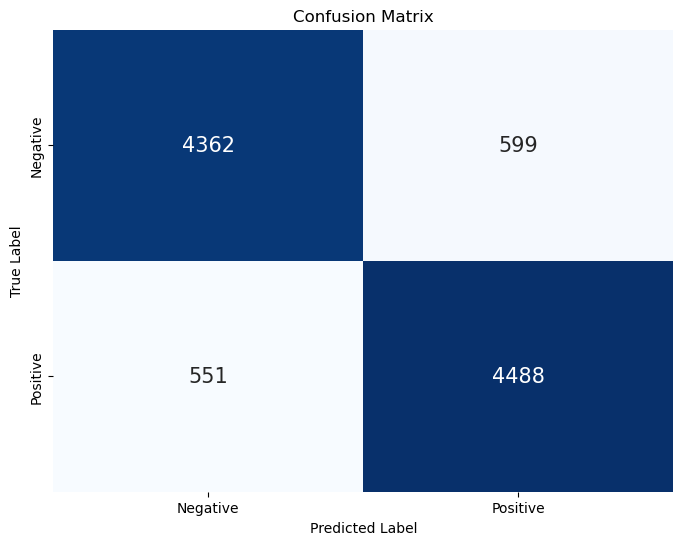

In [56]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 15},
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [57]:
# Display classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.89      0.88      0.88      4961
    Positive       0.88      0.89      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.89      0.88     10000



In [58]:
# Display sample predictions
sample_indices = np.random.choice(len(x_test), 5, replace=False)
for index in sample_indices:
    review_text = ' '.join([str(i) for i in x_test[index] if i != 0])  # Convert indices to string
    true_sentiment = 'Positive' if y_test[index] == 1 else 'Negative'
    predicted_sentiment = 'Positive' if y_pred[index] == 1 else 'Negative'
    probability = model.predict(np.array([x_test[index]]))[0][0]

    print(f"Review: {review_text}")
    print(f"True Sentiment: {true_sentiment}")
    print(f"Predicted Sentiment: {predicted_sentiment} (Probability: {probability:.4f})")
    print()

1/1 [==============================] - 0s 37ms/step
Review: 136 1 321 6 51 212 71 88 859 861 97 1 2630 6 14 667 1869 136 1 6597 3838 286 23 21 74 2 1 1006 5780 108 6 121 1 342 8884 5065 1 61 144 2479 6 5 63 2 2087 4662 9306 20 1 397 258 10 1737 12 13 1 321 29 341 33 77 1 116 33 67 16 48 33 25 18 1 206 63 388 15 68 70 8 1 86 1801 228 38 34 50 108 47 7343 396 2765 21 299 7256 443 10 118 18 22 185 6501 289 918 50 22 63 9 2 2087 4662 281 172 9 53 14 1 219 22 112 5 737 43 22 39 178 5 103 3 374 4 125 521 102 25 3 49 55 16 47 1407 2227 833 91 11 233 26 15 22 43 22 178 49 113 2 108 979 91 26 7126 5 163 3317
True Sentiment: Negative
Predicted Sentiment: Negative (Probability: 0.0008)

1/1 [==============================] - 0s 39ms/step
Review: 73 1451 260 1793 122 11 227 6 34 1071 22 346 5 38 139 5 1673 7 7 56 1354 13 3 1641 1622 15 1086 153 28 98 21 262 24 519 50 28 210 1 17 7 7 300 24 559 14 32 1836 28 281 4695 4532 121 1 1446 1 1622 1941 338 4 2856 2 763 580 790 20 24 8207 4 265 11 13 21 20 